In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Open file
efficiency_fva = pd.read_csv('offensive_efficiency_scores_with_past_seasons.csv')

In [4]:
# Change wins and losses to numerical value
dummy = pd.get_dummies(efficiency_fva['WinOrLoss'])
efficiency_fva = pd.concat([efficiency_fva, dummy], axis = 1)
efficiency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,Win,0.457627,33.406780,35.841356,0,1
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,Win,0.565217,40.695652,46.709565,0,1
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,Win,0.518987,44.632911,50.154937,0,1
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,Win,0.500000,36.000000,41.320000,0,1
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,Loss,0.500000,30.500000,35.440000,1,0


In [5]:
# Create table with numeric values 
efficiency_fva_num = efficiency_fva.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [6]:
# Differences in wins and losses
win = efficiency_fva_num[efficiency_fva_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = efficiency_fva_num[efficiency_fva_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,74.178182,52.803636,26.789091,8.538182,15.669091,10.621818,0.598316,44.912956,52.097024
std,11.632177,8.850625,5.597760,4.181271,4.851400,4.177044,0.074516,11.328978,13.617460
min,47.000000,35.000000,14.000000,0.000000,4.000000,1.000000,0.403226,20.210526,23.090526
25%,66.000000,46.000000,23.000000,5.000000,12.000000,8.000000,0.546771,36.172331,42.508773
50%,74.000000,52.000000,27.000000,8.000000,15.000000,11.000000,0.596491,44.054795,51.959322
75%,82.000000,59.000000,30.000000,11.000000,18.000000,13.000000,0.652778,52.049228,60.550853
max,108.000000,78.000000,43.000000,24.000000,30.000000,25.000000,0.800000,82.329545,97.823182


In [7]:
# Now losses
loss.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.595000,49.805000,21.560000,6.83000,12.130000,13.495000,0.489430,29.767665,34.415559
std,10.987475,7.481097,4.843936,3.50894,4.364441,5.828364,0.082679,9.311686,10.970785
min,20.000000,25.000000,9.000000,0.00000,0.000000,0.000000,0.219512,4.390244,4.390244
25%,53.000000,44.000000,18.000000,4.00000,9.000000,9.000000,0.422571,22.447262,25.337500
50%,60.000000,50.000000,21.000000,7.00000,12.000000,13.000000,0.492186,29.486235,33.996894
75%,66.000000,54.000000,25.000000,9.00000,15.000000,17.000000,0.552255,36.507722,42.318261
max,85.000000,72.000000,35.000000,21.00000,28.000000,35.000000,0.693878,54.296703,68.561319


In [8]:
# Correlations
efficiency_correlations = efficiency_fva_num.corr()
efficiency_correlations

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.546261,0.865947,0.255933,0.561755,-0.205591,0.744957,0.939935,0.916412,-0.535966,0.535966
FieldGoalAttempts,0.546261,1.000000,0.681588,0.600324,0.400990,-0.093042,0.280236,0.459587,0.461540,-0.175921,0.175921
FieldGoalsMade,0.865947,0.681588,1.000000,0.319349,0.634364,-0.143875,0.783184,0.888648,0.886343,-0.439096,0.439096
OffensiveRebounds,0.255933,0.600324,0.319349,1.000000,0.220499,0.094077,0.243366,0.270097,0.274776,-0.211144,0.211144
Assists,0.561755,0.400990,0.634364,0.220499,1.000000,0.008465,0.678436,0.662372,0.739080,-0.352227,0.352227
Turnovers,-0.205591,-0.093042,-0.143875,0.094077,0.008465,1.000000,-0.429632,-0.334677,-0.308561,0.276569,-0.276569
OffensiveEfficiency,0.744957,0.280236,0.783184,0.243366,0.678436,-0.429632,1.000000,0.913111,0.923097,-0.568041,0.568041
EfficientPointsScored,0.939935,0.459587,0.888648,0.270097,0.662372,-0.334677,0.913111,1.000000,0.992751,-0.579896,0.579896
RawEOP,0.916412,0.461540,0.886343,0.274776,0.739080,-0.308561,0.923097,0.992751,1.000000,-0.571175,0.571175
Loss,-0.535966,-0.175921,-0.439096,-0.211144,-0.352227,0.276569,-0.568041,-0.579896,-0.571175,1.000000,-1.000000


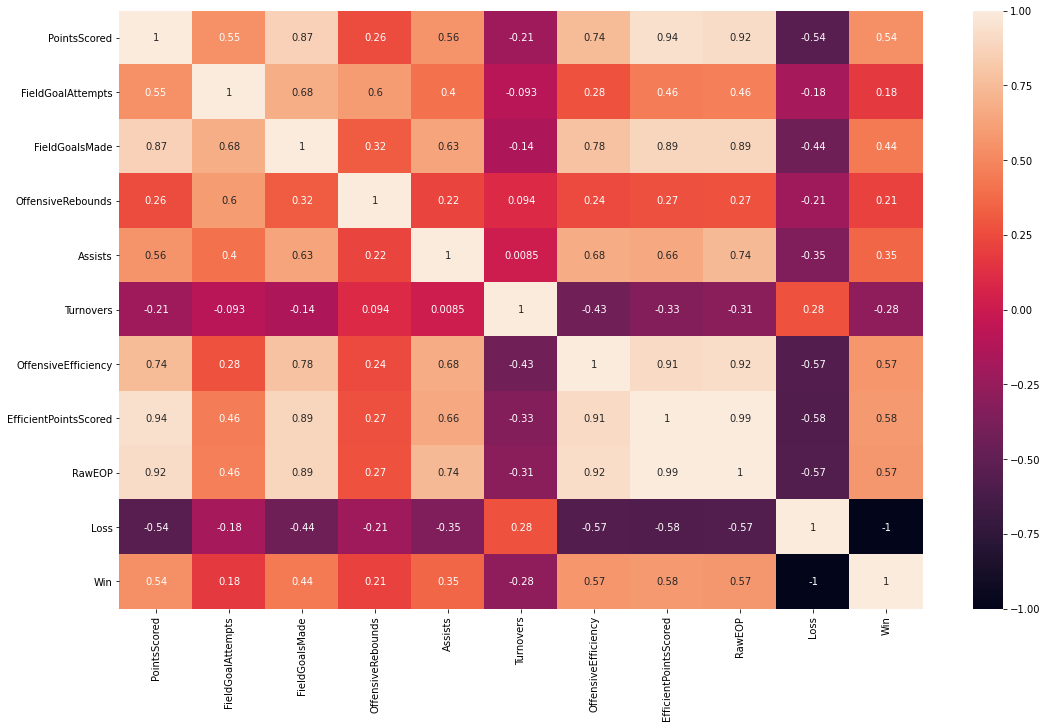

In [9]:
# Correlation heatmap
plt.figure(figsize=(18,11))
sns.heatmap(efficiency_correlations, annot = True );

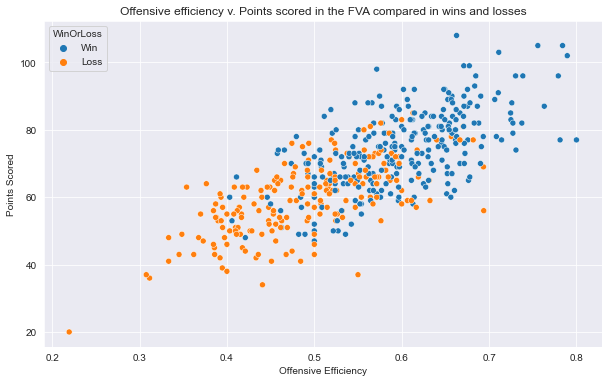

In [10]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficiency", 
                y="PointsScored", 
                hue="WinOrLoss",
                data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
plt.title("Offensive efficiency v. Points scored in the FVA compared in wins and losses");

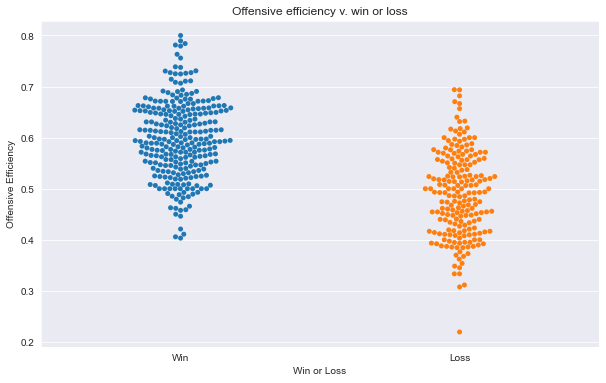

In [11]:
# Swarmplot for wins and losses with offensive efficency
plt.figure(figsize=(10,6))
sns.swarmplot(x=efficiency_fva['WinOrLoss'],
              y=efficiency_fva['OffensiveEfficiency'])
plt.ylabel("Offensive Efficiency")
plt.xlabel("Win or Loss")
plt.title("Offensive efficiency v. win or loss");

In [12]:
# Creating data frames for teams 
appleton_east = efficiency_fva[efficiency_fva.Team == 'Appleton East']
appleton_north = efficiency_fva[efficiency_fva.Team == 'Appleton North']
appleton_west = efficiency_fva[efficiency_fva.Team == 'Appleton West']
fond_du_lac = efficiency_fva[efficiency_fva.Team == 'Fond du Lac']
hortonville = efficiency_fva[efficiency_fva.Team == 'Hortonville']
kaukauna = efficiency_fva[efficiency_fva.Team == 'Kaukauna']
kimberly = efficiency_fva[efficiency_fva.Team == 'Kimberly']
neenah = efficiency_fva[efficiency_fva.Team == 'Neenah']
oshkosh_north = efficiency_fva[efficiency_fva.Team == 'Oshkosh North']
oshkosh_west = efficiency_fva[efficiency_fva.Team == 'Oshkosh West']

In [13]:
# Creating data frames for teams and numeric values
appleton_east_num = appleton_east.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_num = appleton_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_num = appleton_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_num = fond_du_lac.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_num = hortonville.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_num = kaukauna.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_num = kimberly.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_num = neenah.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_num = oshkosh_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_num = oshkosh_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [14]:
# Creating data frames for teams to see what they give up 
appleton_east_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton East']
appleton_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton North']
appleton_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton West']
fond_du_lac_opp = efficiency_fva[efficiency_fva.Opponent == 'Fond du Lac']
hortonville_opp = efficiency_fva[efficiency_fva.Opponent == 'Hortonville']
kaukauna_opp = efficiency_fva[efficiency_fva.Opponent == 'Kaukauna']
kimberly_opp = efficiency_fva[efficiency_fva.Opponent == 'Kimberly']
neenah_opp = efficiency_fva[efficiency_fva.Opponent == 'Neenah']
oshkosh_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh North']
oshkosh_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh West']


In [15]:
# Create numeric values
appleton_east_opp_num = appleton_east_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_opp_num = appleton_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_opp_num = appleton_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_opp_num = fond_du_lac_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_opp_num = hortonville_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_opp_num = kaukauna_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_opp_num = kimberly_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_opp_num = neenah_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_opp_num = oshkosh_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_opp_num = oshkosh_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression

In [114]:
# Features for machine learning model
base_features = ['FieldGoalAttempts', 'FieldGoalsMade', 'OffensiveRebounds', 'Assists', 'Turnovers', 'OffensiveEfficiency', 'EfficientPointsScored', 'RawEOP', 'PointsScored']
X = efficiency_fva_num[base_features]
X

,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,PointsScored
0,51,20,10,7,11,0.457627,33.406780,35.841356,73
1,48,25,3,14,10,0.565217,40.695652,46.709565,72
2,56,27,6,14,15,0.518987,44.632911,50.154937,86
3,55,25,12,14,21,0.500000,36.000000,41.320000,72
4,54,21,6,13,7,0.500000,30.500000,35.440000,61
...,...,...,...,...,...,...,...,...,...
470,49,21,9,11,9,0.533333,37.333333,41.792000,70
471,49,24,7,14,13,0.550725,34.695652,40.555362,63
472,50,24,4,11,7,0.546875,38.281250,42.853125,70
473,44,28,3,15,13,0.623188,52.347826,59.452174,84


In [115]:
# What we are trying to predict: Total points scored 
y = efficiency_fva.Win
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Win, dtype: uint8

In [116]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(380, 9) (95, 9) (380,) (95,)


In [117]:
print(X.shape, y.shape)

(475, 9) (475,)


In [118]:
# Cross validation for Logisitic Regression model
from sklearn.metrics import accuracy_score
lr = LogisticRegression(max_iter = 2000)
lr_cv = cross_val_score(lr, X, y, cv = 10)
print(100 * lr_cv)
print()
print('CV Mean: %.2f%%' % ( 100* lr_cv.mean()))

[64.58333333 83.33333333 85.41666667 62.5        83.33333333 76.59574468
 78.72340426 93.61702128 74.46808511 63.82978723]

CV Mean: 76.64%


In [119]:
# Difference between training and test set for Logistic Regression model 
lr.fit(train_X, train_y)
lr_train_acc = accuracy_score(y_true=train_y, y_pred=lr.predict(train_X))
lr_test_acc = accuracy_score(y_true=val_y, y_pred=lr.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * lr_train_acc))
print('Test Accuracy: %.2f%%' % (100 * lr_test_acc))
print()

Training Accuracy: 77.63%
Test Accuracy: 78.95%



In [120]:
# Cross validation for Decision Tree Classifier model
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt, X, y, cv = 10)
print(100 * dt_cv)
print()
print('CV Mean: %.2f%%' % ( 100* dt_cv.mean()))

[62.5        68.75       79.16666667 62.5        77.08333333 72.34042553
 78.72340426 74.46808511 72.34042553 65.95744681]

CV Mean: 71.38%


In [121]:
# Difference between training and test set for Decision Tree Classifier model 
dt.fit(train_X, train_y)
dt_train_acc = accuracy_score(y_true=train_y, y_pred=dt.predict(train_X))
dt_test_acc = accuracy_score(y_true=val_y, y_pred=dt.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * dt_train_acc))
print('Test Accuracy: %.2f%%' % (100 * dt_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 73.68%



In [122]:
# Cross validation for K-Nearest Neighbor model
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn, X, y, cv = 10)
print(100 * knn_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * knn_cv.mean()))

[64.58333333 85.41666667 81.25       75.         81.25       76.59574468
 76.59574468 76.59574468 76.59574468 59.57446809]

CV Mean: 75.35%


In [123]:
# Difference between training and test set for K-Nearest Neighbor model 
knn.fit(train_X, train_y)
knn_train_acc = accuracy_score(y_true=train_y, y_pred=knn.predict(train_X))
knn_test_acc = accuracy_score(y_true=val_y, y_pred=knn.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * knn_train_acc))
print('Test Accuracy: %.2f%%' % (100 * knn_test_acc))
print()

Training Accuracy: 83.16%
Test Accuracy: 73.68%



In [124]:
# Cross validation for Random Forest Classifier model
rf = RandomForestClassifier(random_state = 1)
rf_cv = cross_val_score(rf, X, y, cv = 10)
print(100 * rf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * rf_cv.mean()))

[72.91666667 81.25       81.25       75.         85.41666667 76.59574468
 76.59574468 87.23404255 74.46808511 72.34042553]

CV Mean: 78.31%


In [125]:
# Difference between training and test set for Random Forest Classifier model 
rf.fit(train_X, train_y)
rf_train_acc = accuracy_score(y_true=train_y, y_pred=rf.predict(train_X))
rf_test_acc = accuracy_score(y_true=val_y, y_pred=rf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * rf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * rf_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 73.68%



In [126]:
# Cross validation for SVC model
svc = SVC(probability = True)
svc_cv = cross_val_score(svc, X, y, cv = 10)
print(100 * svc_cv)
print()
print('CV Mean: %.2f%%' % ( 100* svc_cv.mean()))

[68.75       81.25       89.58333333 62.5        89.58333333 72.34042553
 72.34042553 87.23404255 76.59574468 65.95744681]

CV Mean: 76.61%


In [127]:
# Difference between training and test set for SVC model 
svc.fit(train_X, train_y)
svc_train_acc = accuracy_score(y_true=train_y, y_pred=svc.predict(train_X))
svc_test_acc = accuracy_score(y_true=val_y, y_pred=svc.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * svc_train_acc))
print('Test Accuracy: %.2f%%' % (100 * svc_test_acc))
print()

Training Accuracy: 78.42%
Test Accuracy: 72.63%



In [128]:
# Cross validation for XGB Classifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
xgb_cv = cross_val_score(xgb, X, y, cv = 10)
print(100 * xgb_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * xgb_cv.mean()))

[16:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [129]:
xgb.fit(train_X, train_y)
xgb_train_acc = accuracy_score(y_true=train_y, y_pred=xgb.predict(train_X))
xgb_test_acc = accuracy_score(y_true=val_y, y_pred=xgb.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * xgb_train_acc))
print('Test Accuracy: %.2f%%' % (100 * xgb_test_acc))
print()

[16:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.00%
Test Accuracy: 75.79%



In [130]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'soft')
voting_clf_cv = cross_val_score(voting_clf, X, y, cv = 10)
print(100 * voting_clf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * voting_clf_cv.mean()))

[16:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [131]:
voting_clf.fit(train_X, train_y)
voting_clf_train_acc = accuracy_score(y_true=train_y, y_pred=voting_clf.predict(train_X))
voting_clf_test_acc = accuracy_score(y_true=val_y, y_pred=voting_clf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * voting_clf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * voting_clf_test_acc))
print()

[16:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 98.42%
Test Accuracy: 71.58%



In [132]:
# Compare all results in data frame
results_on_val_X = [lr_test_acc, dt_test_acc, rf_test_acc, knn_test_acc, xgb_test_acc, svc_test_acc, voting_clf_test_acc]
results_on_val_X = pd.DataFrame(results_on_val_X)
results_on_val_X = results_on_val_X.rename(columns = {0: 'Test Accuracy'})
results_on_val_X['Test Accuracy'] = 100 * results_on_val_X['Test Accuracy']
results_on_val_X = results_on_val_X.rename(index = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGB Classifier', 5: 'SVC', 6: 'Voting Classifier'})
results_on_val_X['CV Accuracy'] = [lr_cv.mean(), dt_cv.mean(), rf_cv.mean(), knn_cv.mean(), xgb_cv.mean(), svc_cv.mean(), voting_clf_cv.mean()]
results_on_val_X['CV Accuracy'] = 100 * results_on_val_X['CV Accuracy']
results_on_val_X

,Test Accuracy,CV Accuracy
Logistic Regression,78.947368,76.640071
Decision Tree,73.684211,71.382979
Random Forest,73.684211,78.306738
KNN,73.684211,75.345745
XGB Classifier,75.789474,77.894504
SVC,72.631579,76.613475
Voting Classifier,71.578947,77.890071


In [133]:
# Feature weights for Logistic Regression model
import eli5
from eli5.sklearn import PermutationImportance
lr.fit(train_X, train_y)
perm = PermutationImportance(lr, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.3095 ± 0.1095,PointsScored
0.2253 ± 0.0491,FieldGoalsMade
0.1811 ± 0.0710,OffensiveRebounds
0.1516 ± 0.0342,FieldGoalAttempts
0.1347 ± 0.1148,Turnovers
0.0947 ± 0.0231,EfficientPointsScored
0.0800 ± 0.0509,Assists
0.0253 ± 0.0509,RawEOP
0 ± 0.0000,OffensiveEfficiency


In [134]:
# Feature weights for Random Forest model 
rf.fit(train_X, train_y)
perm2 = PermutationImportance(rf, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

Weight,Feature
0.0316 ± 0.0352,RawEOP
0.0211 ± 0.0352,Turnovers
0.0168 ± 0.0215,OffensiveRebounds
0.0168 ± 0.0253,Assists
0.0147 ± 0.0413,PointsScored
0.0084 ± 0.0450,FieldGoalsMade
0.0063 ± 0.0286,FieldGoalAttempts
-0.0042 ± 0.0286,OffensiveEfficiency
-0.0105 ± 0.0352,EfficientPointsScored


In [135]:
# For KNeighbors model 
data_for_prediction = val_X.iloc[0:]  # use 1 row of data here. Could use multiple rows if desired
percent_chances = rf.predict_proba(data_for_prediction)
percent_chances = pd.DataFrame(percent_chances)
percent_chances = percent_chances.rename(columns = {0 :'% chance of loss', 1: '% chance of win'})
#percent_chances
val_X = pd.DataFrame(val_X)
val_y = pd.DataFrame(val_y)
total_val = [val_X, val_y]
total_val = pd.concat(total_val, axis = 1)
total_val = total_val.reset_index(drop=True)
predictions = [total_val, percent_chances]
predictions = pd.concat(predictions, axis = 1)
predictions['% chance of loss'] = 100 * predictions['% chance of loss']
predictions['% chance of win'] = 100 * predictions['% chance of win']
predictions.to_csv('WinOrLossPredictions.csv')


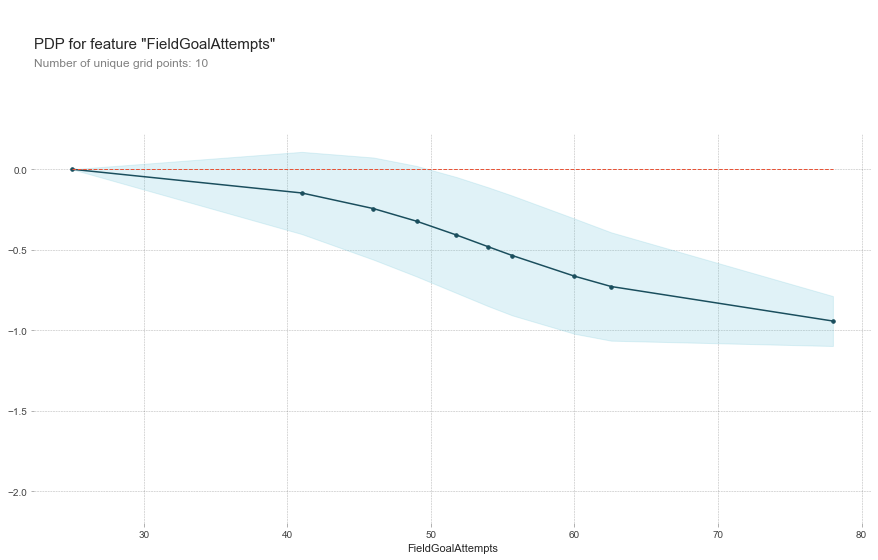

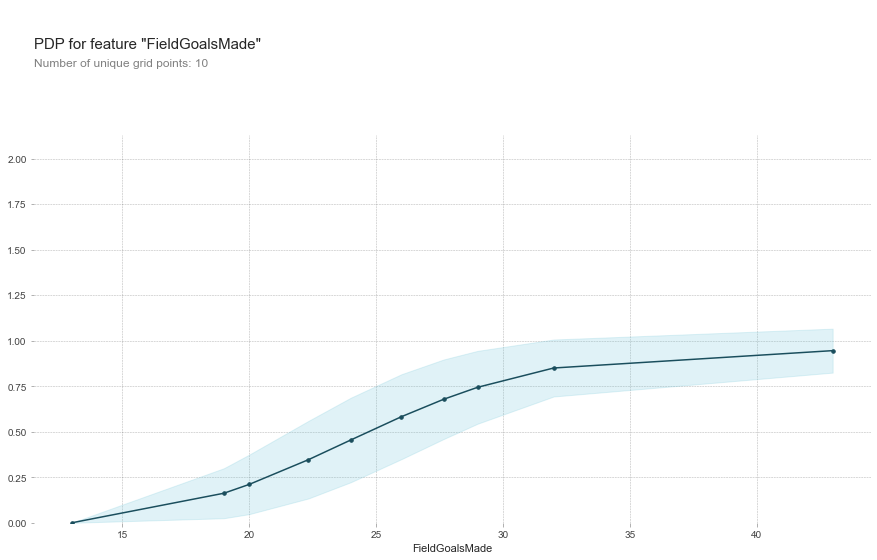

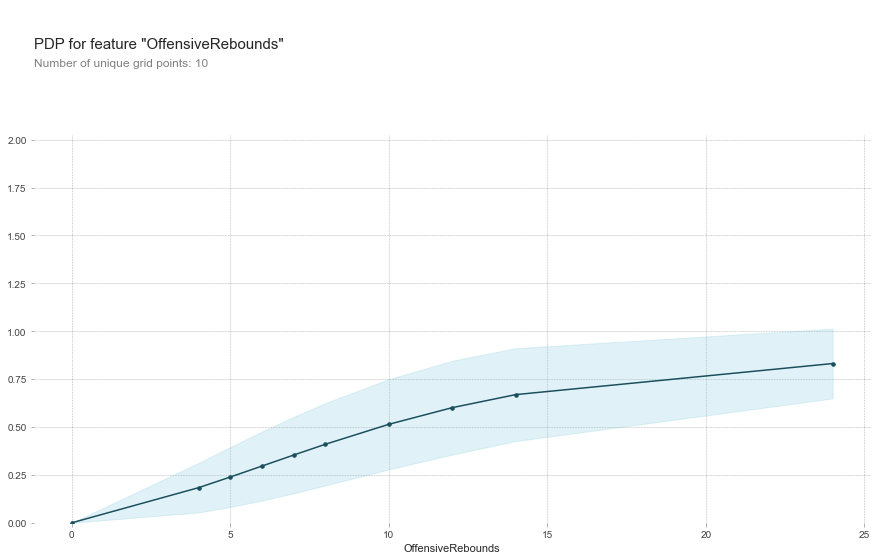

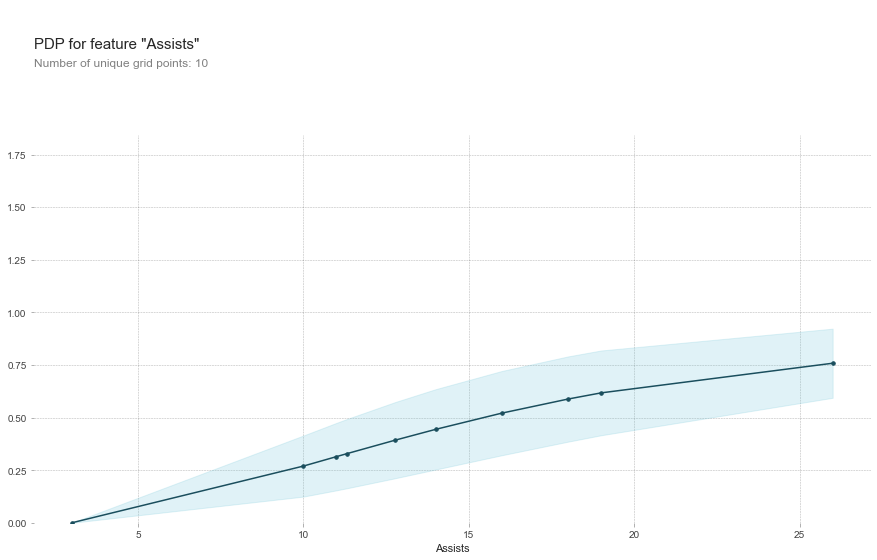

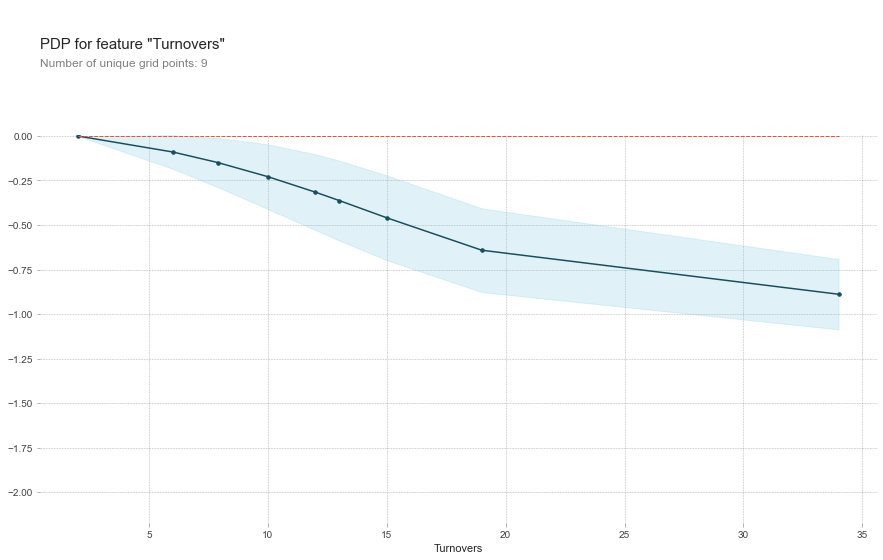

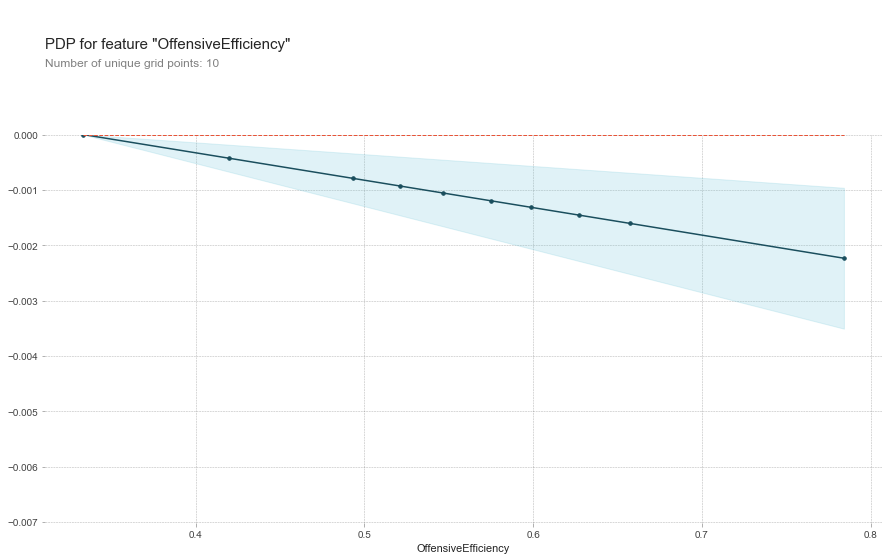

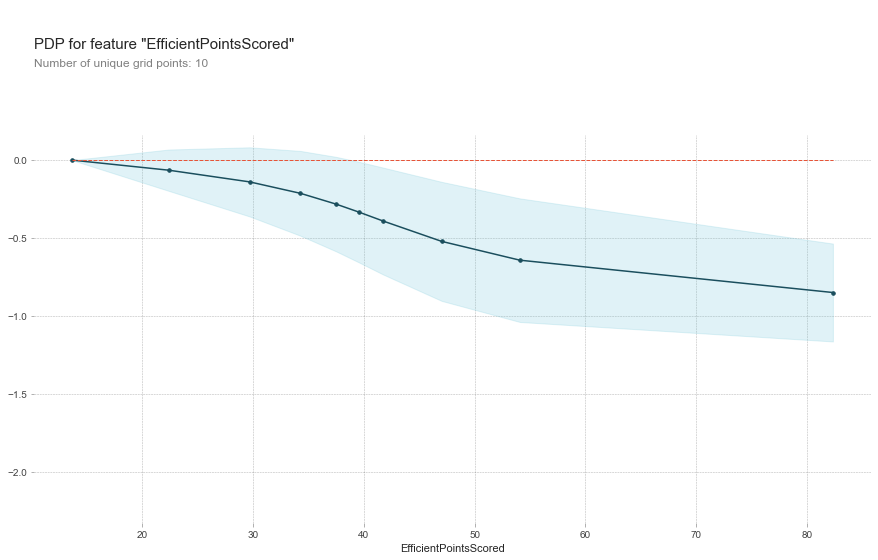

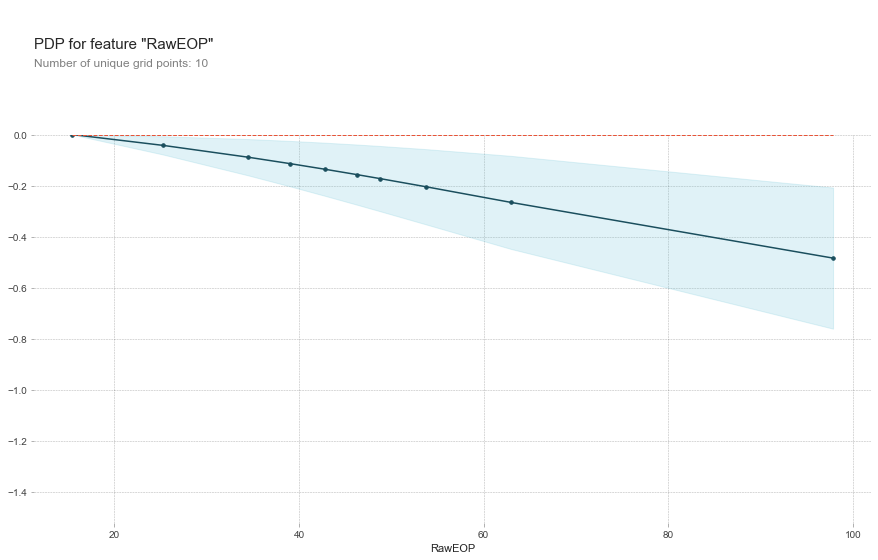

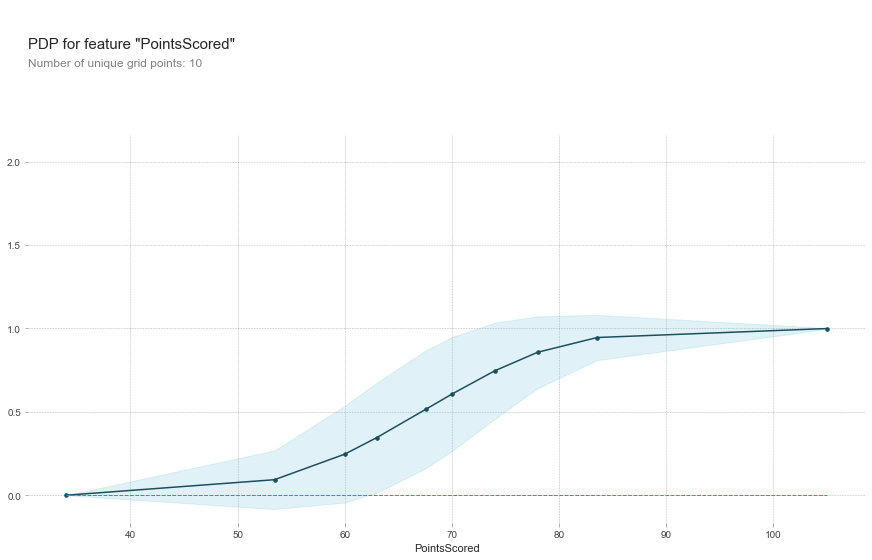

In [136]:
from pdpbox import pdp, get_dataset, info_plots
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model = lr, dataset = val_X, model_features = base_features, feature = feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

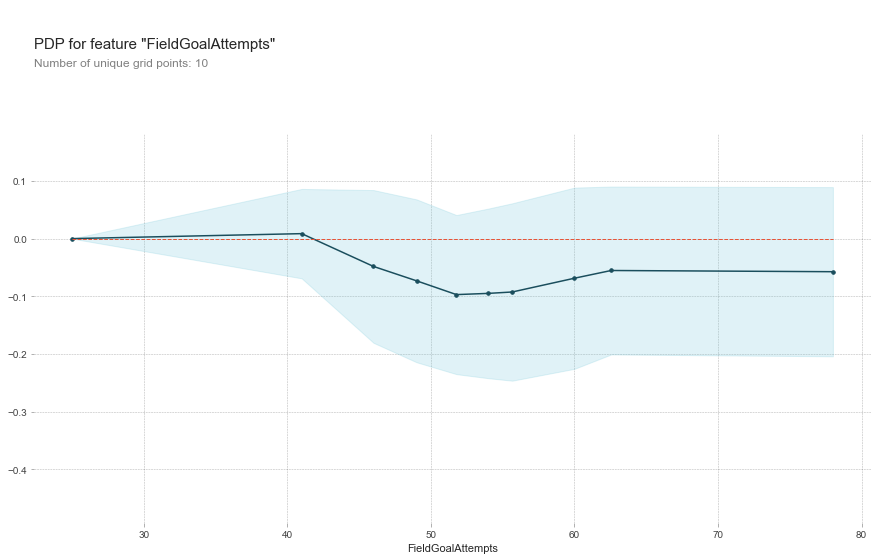

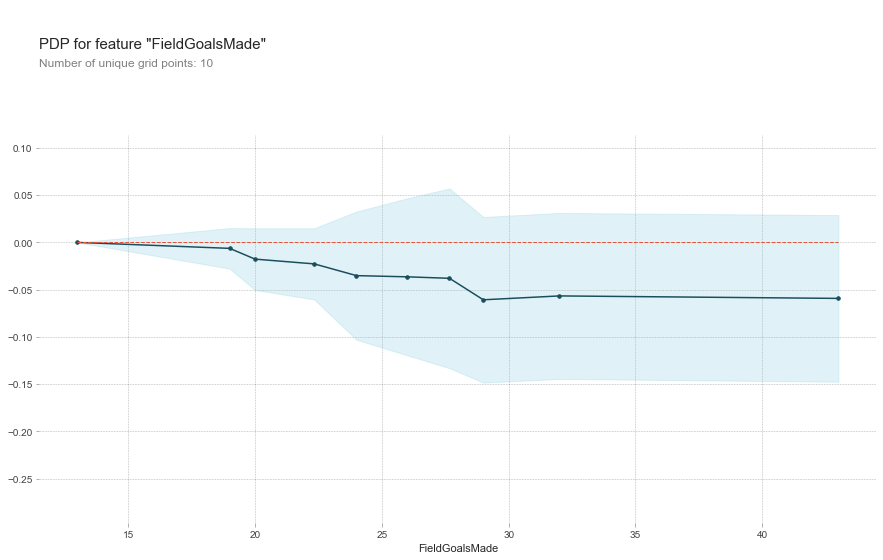

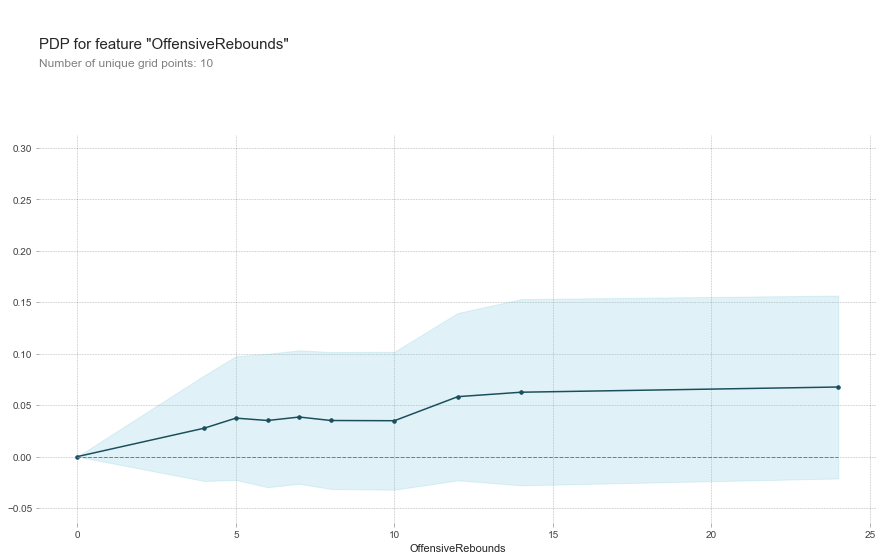

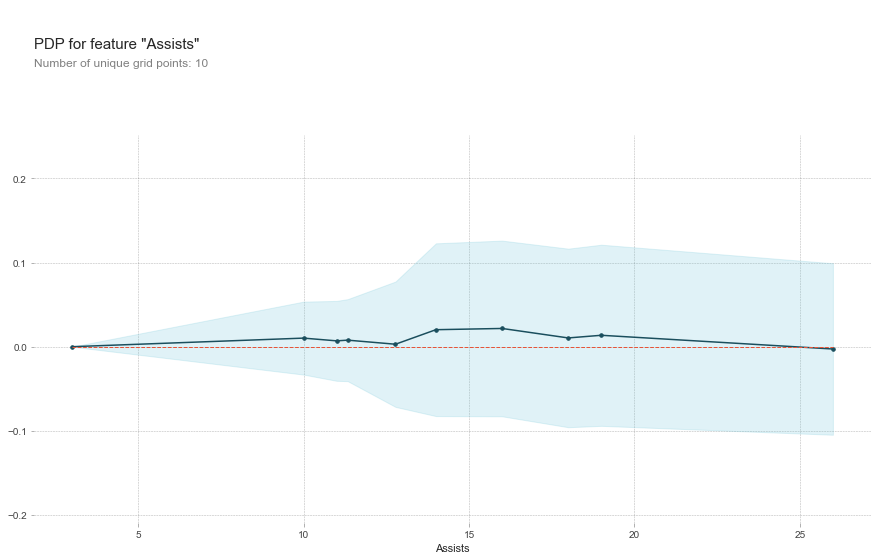

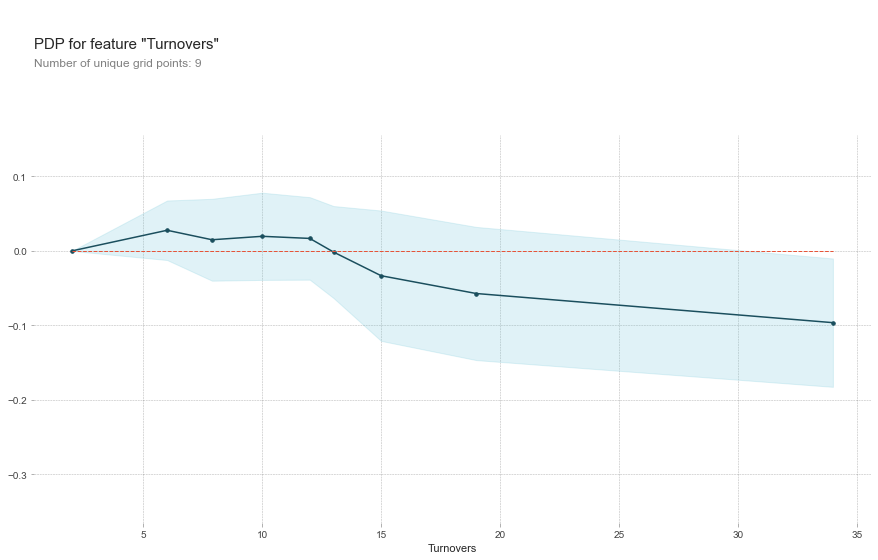

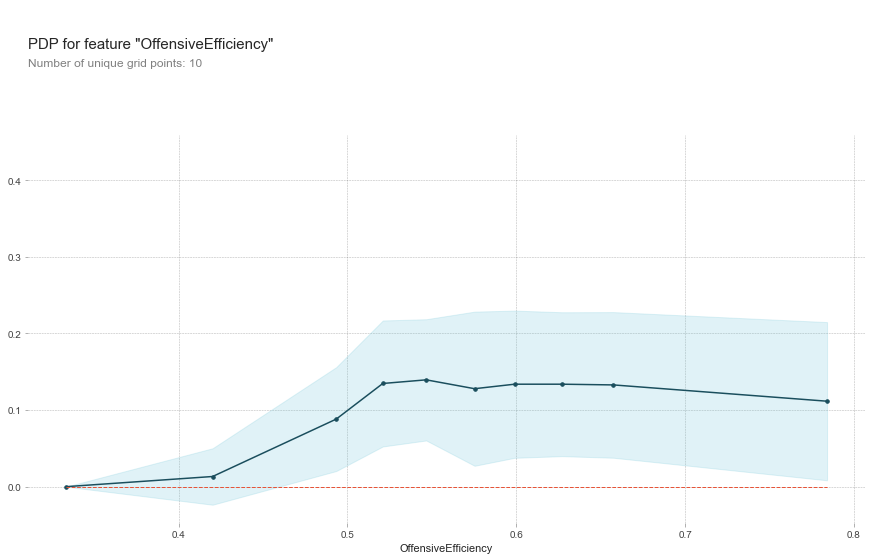

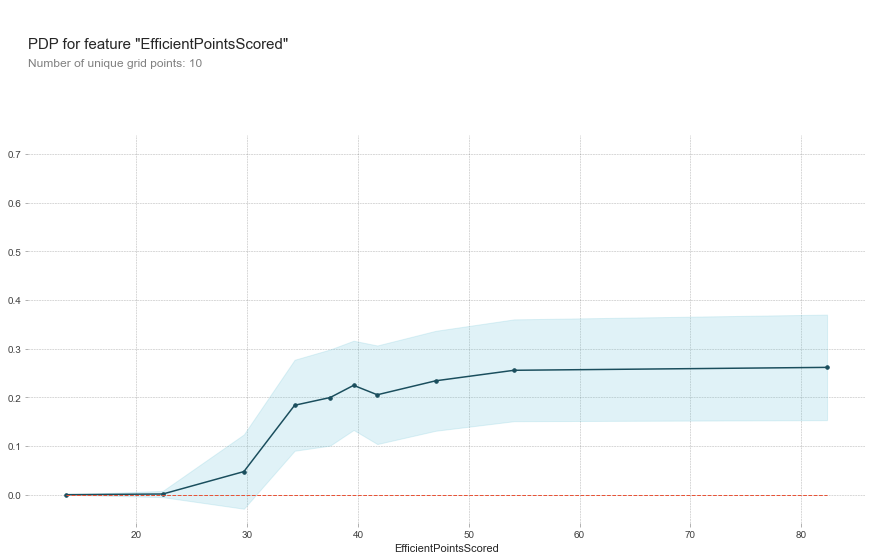

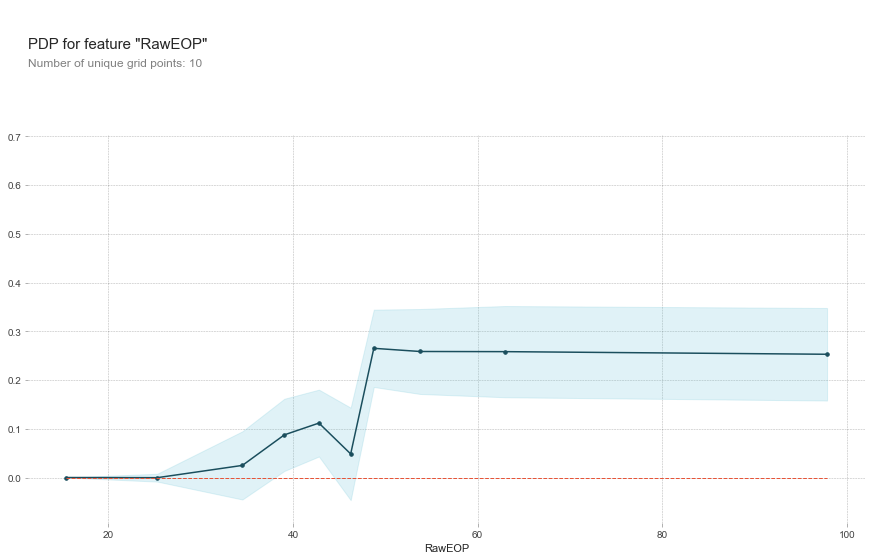

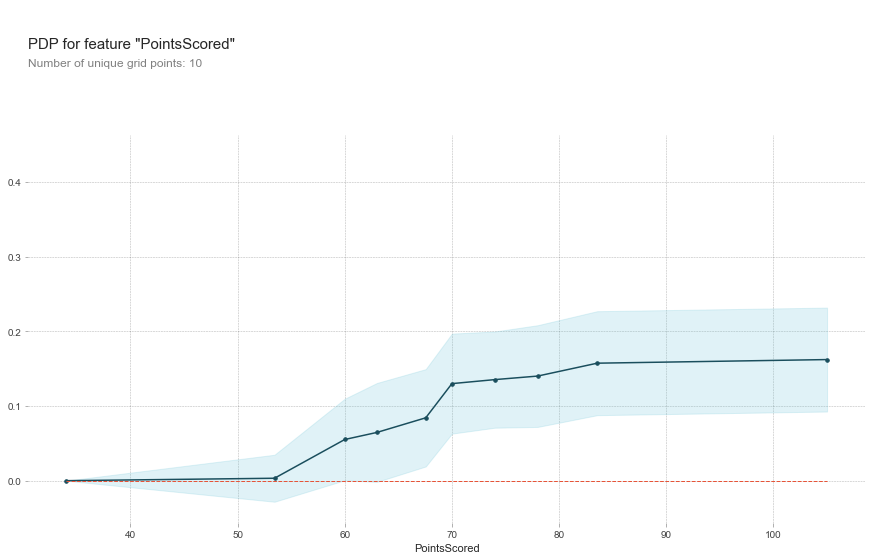

In [137]:
from pdpbox import pdp, get_dataset, info_plots
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model = rf, dataset = val_X, model_features = base_features, feature = feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

1. feature 6 (0.178064)
2. feature 7 (0.162069)
3. feature 5 (0.145043)
4. feature 8 (0.119369)
5. feature 1 (0.094333)
6. feature 0 (0.083813)
7. feature 4 (0.078867)
8. feature 3 (0.075587)
9. feature 2 (0.062855)


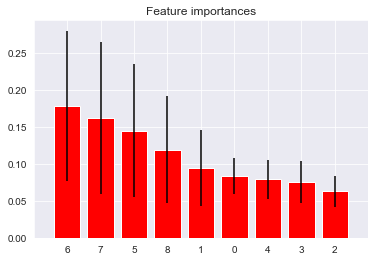

In [138]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_X, train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [139]:
base_features = pd.DataFrame(base_features)
base_features

,0
0,FieldGoalAttempts
1,FieldGoalsMade
2,OffensiveRebounds
3,Assists
4,Turnovers
5,OffensiveEfficiency
6,EfficientPointsScored
7,RawEOP
8,PointsScored


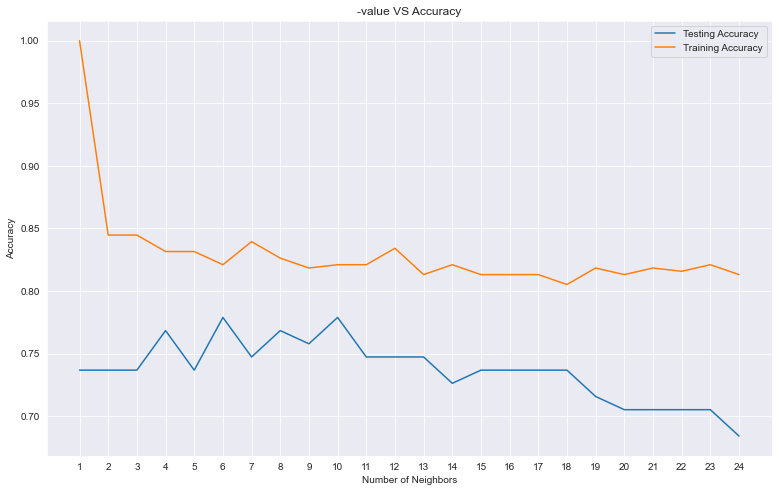

Best accuracy is 0.7789473684210526 with K = 6


In [141]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(train_X, train_y)
    #train accuracy
    train_accuracy.append(knn.score(train_X, train_y))
    # test accuracy
    test_accuracy.append(knn.score(val_X, val_y))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))